In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Convert results from JSON to CSV

In [2]:
with open("./distribution/eval_mobilenet_v2.json") as f:
    eval_results = json.load(f)

In [52]:
metric = eval_results["metric"]
cls_names, acc = [], []
for key in metric:
    # Split IoU.wall -> [IoU, wall]
    class_name = key.split('.')
    if len(class_name) != 2 or key[:3] == 'Acc':
        continue
    
    cls_names.append(class_name[1])
    acc.append(metric[key])
    

In [53]:
accuracy = pd.DataFrame({'IoU': acc}, index=cls_names)

In [54]:
accuracy.head()

,IoU
wall,0.6568
building,0.7629
sky,0.9048
floor,0.6903
tree,0.6660


In [2]:
# file_path = './distribution/ade20k_acc.csv'
# accuracy = pd.read_csv(file_path, index_col=1)

In [58]:
selected_dist = accuracy['IoU'].sort_values()
top_limit_class = 10
sorted_selected_dist = selected_dist[:top_limit_class]

In [59]:
sorted_selected_dist

flag          0.0000
dirt track    0.0000
lake          0.0000
step          0.0000
blanket       0.0000
shower        0.0000
crt screen    0.0001
land          0.0012
bag           0.0031
glass         0.0040
Name: IoU, dtype: float64

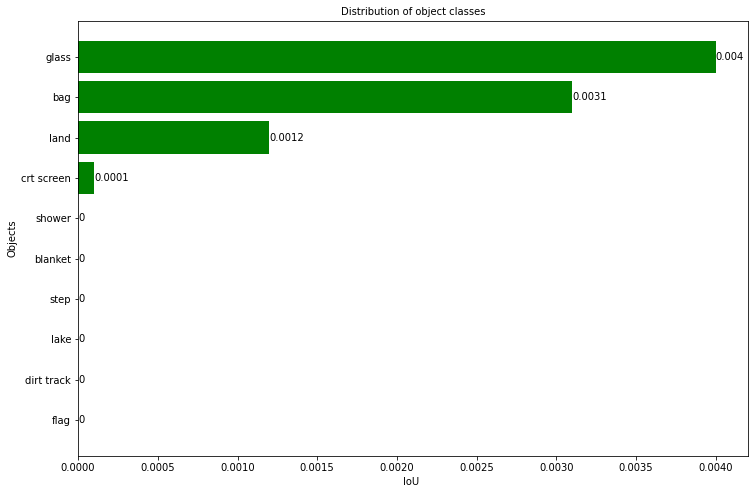

In [61]:
font_size = 10
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(sorted_selected_dist.index, sorted_selected_dist.values, color='g')
ax.set_title('Distribution of object classes', fontsize=font_size)
ax.set_ylabel('Objects', fontsize=font_size)
ax.set_xlabel('IoU ', fontsize=font_size)
ax.bar_label(bars, fontsize=font_size)
ax.tick_params(axis="x", labelsize=font_size)
ax.tick_params(axis="y", labelsize=font_size)

### Loss curve

#### Montage 224 x 224

In [5]:
loss_m224 = []

In [6]:
with open("distribution/montage_224/montage_224_1.json", 'rb') as f:
    content_1 = json.load(f)
    
with open("distribution/montage_224/montage_224_2.json", 'rb') as f:
    content_2 = json.load(f)

In [7]:
for record in content_1:
    if record['mode'] == 'val':
        continue
    
    loss_m224.append(record['loss'])

for record in content_2:
    if record['mode'] == 'val':
        continue
    
    loss_m224.append(record['loss'])

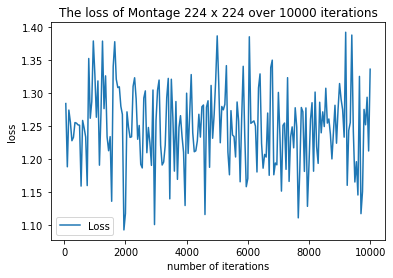

In [8]:
# ROUGE-1
x = list(range(50, 10001, 50))

# plot line 1
plt.plot(x, loss_m224, label="Loss")

# add legend and labels
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.title("The loss of Montage 224 x 224 over 10000 iterations")

# display the plot
plt.show()

#### Copy Paste

In [10]:
loss_cp = []

In [9]:
with open("distribution/copy-paste/copy-paste_1.json", 'rb') as f:
    content_1 = json.load(f)
    
with open("distribution/copy-paste/copy-paste_2.json", 'rb') as f:
    content_2 = json.load(f)

In [11]:
for record in content_1:
    if record['mode'] == 'val':
        continue
    
    loss_cp.append(record['loss'])

for record in content_2:
    if record['mode'] == 'val':
        continue
    
    loss_cp.append(record['loss'])

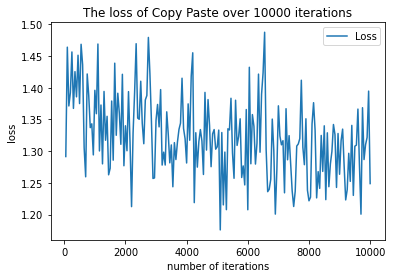

In [12]:
# ROUGE-1
x = list(range(50, 10001, 50))

# plot line 1
plt.plot(x, loss_cp, label="Loss")

# add legend and labels
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.title("The loss of Copy Paste over 10000 iterations")

# display the plot
plt.show()

#### Montage 512 x 512

In [13]:
with open("distribution/montage_512/montage_512_1.json", 'rb') as f:
    loss_m512 = json.load(f)
    
with open("distribution/montage_512/montage_512_2.json", 'rb') as f:
    content_2 = json.load(f)

In [14]:
for record in content_2:
    if record['mode'] == 'val':
        continue
    
    loss_m512.append(record['loss'])

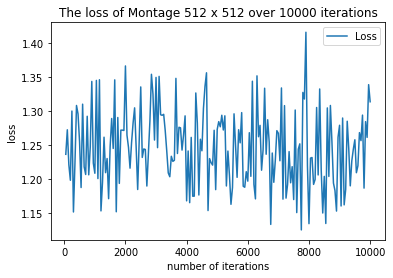

In [16]:
# ROUGE-1
x = list(range(50, 10001, 50))

# plot line 1
plt.plot(x, loss_m512, label="Loss")

# add legend and labels
plt.legend()
plt.xlabel("number of iterations")
plt.ylabel("loss")
plt.title("The loss of Montage 512 x 512 over 10000 iterations")

# display the plot
plt.show()